Epoch 1: Loss = 0.20402566485572607
Epoch 11: Loss = 0.0032114776336806374
Epoch 21: Loss = 0.0008793145889434584
Epoch 31: Loss = 0.0003265011541332896
Epoch 41: Loss = 0.00021571713838344664
Epoch 51: Loss = 0.00018186397736486058
Epoch 61: Loss = 0.00016028237695053349
Epoch 71: Loss = 0.00013957932431308607
Epoch 81: Loss = 0.0001224728528535346
Epoch 91: Loss = 0.00010650133875341084


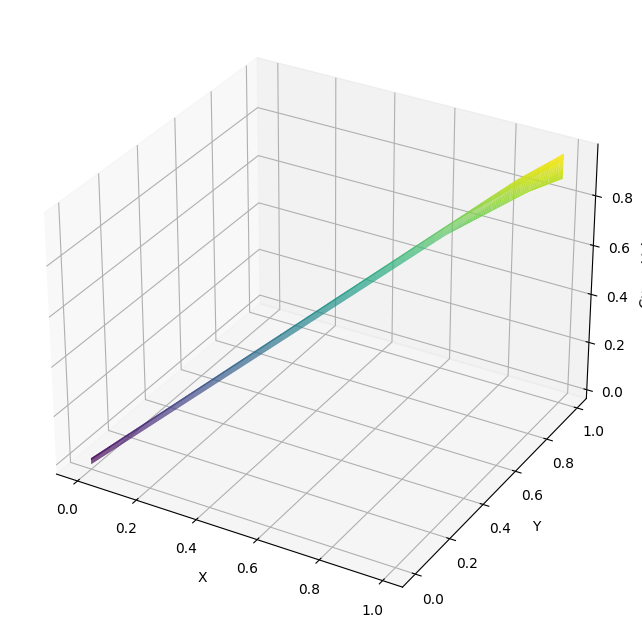

In [25]:
import numpy as np
import torch
import torch.nn as nn

# Step 1: Generate Data
x = np.arange(0, 1, 0.01)
y = np.sin(2 * np.pi * x) + 0.001 * np.random.randn(len(x))

# Step 2: Define your model
class CurveFitter(nn.Module):
    def __init__(self):
        super(CurveFitter, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 3: Define your loss function and optimizer
model = CurveFitter()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Step 4: Train your model
for epoch in range(100):
    running_loss = 0.0
    for i in range(len(x)):
        inputs = torch.tensor([x[i], y[i]], dtype=torch.float32)
        labels = torch.tensor([np.sin(2 * np.pi * x[i])], dtype=torch.float32)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    if epoch%10==0: print(f"Epoch {epoch+1}: Loss = {running_loss/len(x)}")

# Step 5: Use your model to predict the curve values
x_test = np.arange(0, 1, 0.01)
y_test = np.arange(0, 1, 0.01)
curve_predictions = []

for i in range(len(x_test)):
    for j in range(len(y_test)):
        inputs = torch.tensor([x_test[i], y_test[j]], dtype=torch.float32)
        prediction = model(inputs).item()
        curve_predictions.append(prediction)

curve_predictions = np.array(curve_predictions).reshape(len(x_test), len(y_test))

# Plot the results
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_test, y_test, curve_predictions, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Curve Value')
plt.show()


In [34]:
import matplotlib.pyplot as plt

# Generate test input values
x_test = torch.linspace(0, 1, 100)
y_test = torch.linspace(-1, 1, 100)

# Compute curve predictions for test input values
curve_predictions = model(torch.stack([x_test, y_test], axis=1)).detach().numpy()

# Reshape curve_predictions into a grid
curve_predictions = curve_predictions.reshape((x_test.shape[0], y_test.shape[0]))

# Extract the slice of the surface at z=0
z0_slice = curve_predictions[..., 49]

# Plot the slice as a 2D heatmap
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.imshow(z0_slice, extent=[0, 1, -1, 1], cmap='viridis', origin='lower')
ax.plot(x_test, np.sin(2*np.pi*x_test), label='True Curve', linestyle='--', color='white')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()


ValueError: cannot reshape array of size 100 into shape (100,100)

In [38]:
display(torch.stack([x_test, y_test], axis=1))

tensor([[ 0.0000, -1.0000],
        [ 0.0101, -0.9798],
        [ 0.0202, -0.9596],
        [ 0.0303, -0.9394],
        [ 0.0404, -0.9192],
        [ 0.0505, -0.8990],
        [ 0.0606, -0.8788],
        [ 0.0707, -0.8586],
        [ 0.0808, -0.8384],
        [ 0.0909, -0.8182],
        [ 0.1010, -0.7980],
        [ 0.1111, -0.7778],
        [ 0.1212, -0.7576],
        [ 0.1313, -0.7374],
        [ 0.1414, -0.7172],
        [ 0.1515, -0.6970],
        [ 0.1616, -0.6768],
        [ 0.1717, -0.6566],
        [ 0.1818, -0.6364],
        [ 0.1919, -0.6162],
        [ 0.2020, -0.5960],
        [ 0.2121, -0.5758],
        [ 0.2222, -0.5556],
        [ 0.2323, -0.5354],
        [ 0.2424, -0.5152],
        [ 0.2525, -0.4949],
        [ 0.2626, -0.4747],
        [ 0.2727, -0.4545],
        [ 0.2828, -0.4343],
        [ 0.2929, -0.4141],
        [ 0.3030, -0.3939],
        [ 0.3131, -0.3737],
        [ 0.3232, -0.3535],
        [ 0.3333, -0.3333],
        [ 0.3434, -0.3131],
        [ 0.3535, -0